<a href="https://colab.research.google.com/github/A-R-M-028/Detection-of-Dog-or-Cat-Using-Convolutional-Neural-Network-CNN-/blob/main/D51_Dog_or_Cat_Using_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Link:
https://www.kaggle.com/c/dogs-vs-cats/data?select=sampleSubmission.csv


# Importing the libraries

In [ ]:
import numpy as np # Working with math
import pandas as pd # Working with 2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img # Processing Image
from tensorflow.keras.utils import to_categorical # To binary
from sklearn.model_selection import train_test_split # Spliting dataset
import matplotlib.pyplot as plt # Ploting
import random # Image Filtering
import os # Work with path

### Defining the Image Properties

In [ ]:
Image_Width = 128
Image_Height = 128
Image_size = (Image_Width, Image_Height)
Image_Channels = 3

In [ ]:
folder_path = os.listdir('/content/drive/MyDrive/Projects/DL/Datasets/Cat-and-dogs/train')

In [ ]:
file_path = '/content/drive/MyDrive/Projects/DL/Datasets/Cat-and-dogs/train'

In [ ]:
folder_path[0]

'dog.9108.jpg'

In [ ]:
len(folder_path)

25050

In [ ]:
f'{file_path}/{folder_path[0]}'

In [ ]:
pixel_matrix = plt.imread(f'{file_path}/{folder_path[0]}')

In [ ]:
pixel_matrix # For 1 Image

array([[[181, 185, 186],
        [183, 187, 188],
        [186, 190, 191],
        ...,
        [211, 201, 192],
        [202, 192, 183],
        [148, 138, 129]],

       [[179, 183, 184],
        [180, 184, 185],
        [182, 186, 187],
        ...,
        [208, 198, 189],
        [222, 212, 203],
        [152, 142, 133]],

       [[180, 184, 185],
        [180, 184, 185],
        [180, 184, 185],
        ...,
        [181, 171, 162],
        [239, 229, 220],
        [165, 155, 146]],

       ...,

       [[ 22,  17,  24],
        [ 23,  18,  25],
        [ 28,  23,  30],
        ...,
        [172, 158, 145],
        [174, 160, 147],
        [173, 159, 146]],

       [[ 28,  21,  28],
        [ 25,  18,  25],
        [ 26,  19,  26],
        ...,
        [170, 156, 143],
        [171, 157, 144],
        [171, 157, 144]],

       [[ 28,  21,  28],
        [ 25,  18,  25],
        [ 26,  19,  26],
        ...,
        [170, 156, 143],
        [171, 157, 144],
        [169, 155, 142]]

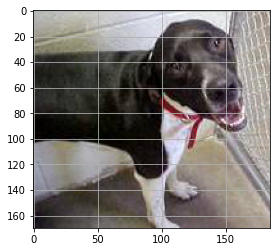

In [ ]:
plt.imshow(pixel_matrix)
plt.grid()

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


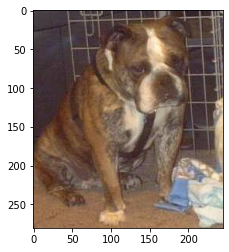

In [ ]:
for i in range(10):
  pixel_matrix = plt.imread(f'{file_path}/{folder_path[i]}')
  plt.imshow(pixel_matrix)
  plt.grid()

In [ ]:
# Dog - 1
# Cat - 0

In [ ]:
categories = [1 if 'dog' in i else 0 for i in folder_path]

In [ ]:
categories

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
feature = [f'{file_path}/{folder_path[i]}' for i in range(len(folder_path))]

In [ ]:
feature[-1]

In [ ]:
df = pd.DataFrame({"feature": feature,
                   "target": categories})

In [ ]:
df.head()

In [ ]:
df['feature'][0]

# CNN Model

In [ ]:
from tensorflow.keras.models import Sequential # All the neural network inside Sequential only
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [ ]:
# Cov2D -> Convolutional Layer
# MaxPooling2D -> Pooling Layer
# Dropout -> To prevent the Neural Nets from Overfitting
# Flatten -> Flattening the matrix -> 2D -> 1D
# Dense -> Connected Neural Networks
# Actiavtion -> Activation Funtion
# BatchNormalization -> Feature Scaling

In [ ]:
model = Sequential(
    # Layer 1,
    # Layer 2
)

In [ ]:
# 3 CNN Layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
# 1st Hidden Layer
model.add(Dense(500, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# 2nd Hidden Layer
model.add(Dense(100, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Train and Test is given -> Need validation Set